# Structure Property Relationships

In [2]:
import numpy as np 
import pandas as pd
import canela

import ase
import seaborn as sns
import ase.io
from ase.visualize import view
import canela.lpnc as lpnc
import re
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
files = !ls *.xyz

In [4]:
atoms = ase.io.read(files[0])

print(atoms)

Atoms(symbols='C14H42Au18S14', pbc=False)


In [5]:
n_metal = []
n_dope = []
n_ligand = []
ligands = []
NC = []
q = []
E_q = []
path = []

In [6]:
for file in files:
    gold_n = int(file.split('_')[0])
    ln = file.split('_')[1]
    n_metal.append(gold_n)
    n_dope.append(0)
    n_ligand.append(ln)
    ligands.append('sch3')
    NC.append(f'Au{gold_n}(sch3){ln}')
    f = open(file, "r")
    E_q.append(float(f.read().split('\n')[1].split()[-1]))
    q.append(0)
    path.append(f'sch3_protected/{file}')

In [7]:
df = pd.DataFrame({'NC':NC,'n_metal':n_metal,'n_dope':n_dope,'n_ligand':n_ligand,'ligands':ligands,'q':q,'E_q':E_q,'E_q-1':['none']*len(n_metal),
                   'E_q.1':['none']*len(n_metal),'EA':['none']*len(n_metal),'IP':['none']*len(n_metal),'HOMO':['none']*len(n_metal),'LUMO':['none']*len(n_metal),
                   'GAP':['none']*len(n_metal),'path':path})

In [8]:
df

,NC,n_metal,n_dope,n_ligand,ligands,q,E_q,E_q-1,E_q.1,EA,IP,HOMO,LUMO,GAP,path
0,Au18(sch3)14,18,0,14,sch3,0,-845.991963,none,none,none,none,none,none,none,sch3_protected/018_14_cp2k_opt.xyz
1,Au20(sch3)16,20,0,16,sch3,0,-947.849965,none,none,none,none,none,none,none,sch3_protected/020_16_cp2k_opt.xyz
2,Au23(sch3)16,23,0,16,sch3,0,-1047.669766,none,none,none,none,none,none,none,sch3_protected/023_16_minus1_cp2k_opt.xyz
3,Au24(sch3)20,24,0,20,sch3,0,-1151.591146,none,none,none,none,none,none,none,sch3_protected/024_20_cp2k_opt.xyz
4,Au25(sch3)18,25,0,18,sch3,0,-1149.428619,none,none,none,none,none,none,none,sch3_protected/025_18_minus1_cp2k_opt.xyz
5,Au25(sch3)18,25,0,18,sch3,0,-1149.428102,none,none,none,none,none,none,none,sch3_protected/025_18_neutral_cp2k_opt.xyz
6,Au28(sch3)20,28,0,20,sch3,0,-1284.551124,none,none,none,none,none,none,none,sch3_protected/028_20_cp2k_opt.xyz
7,Au30(sch3)18,30,0,18,sch3,0,-1315.611283,none,none,none,none,none,none,none,sch3_protected/030_18_cp2k_opt.xyz
8,Au30(sch3)19,30,0,19,sch3,0,-1325.878912,none,none,none,none,none,none,none,sch3_protected/030_19_cp2k_opt.xyz
9,Au36(sch3)24,36,0,24,sch3,0,-1621.248054,none,none,none,none,none,none,none,sch3_protected/036_24_cp2k_opt.xyz


In [9]:
df1 = pd.read_csv('../fully_protected_ncs.csv')

In [10]:
df1

,NC,n_metal,n_dope,n_ligand,ligands,q,E_q,E_q-1,E_q.1,EA,IP,HOMO,LUMO,GAP,path
0,Au18(S-c-hex)14,18,0,14,CYCLOHEX,0,-35674.11,-35675.93,-35668.73,-1.81,5.39,-4.310000,-2.870000,1.440000,fully_protected\au18_schex14_opt.xyz
1,Au20(TBBT)16,20,0,16,TBBT,0,-50670.02,-50671.99,-50664.70,-1.97,5.32,-4.480000,-2.860000,1.620000,fully_protected\au20_tbbt16_opt.xyz
2,Au21(SAdm)15,21,0,15,SAdm,0,-50034.64,-50036.25,-50029.80,-1.61,4.84,-3.910000,-2.550000,1.350000,fully_protected\au21_sadm15_opt.xyz
3,Au22(SAdm)16,22,0,16,SAdm,0,-53008.45,-53010.18,-53003.47,-1.73,4.98,-4.070000,-2.670000,1.400000,fully_protected\au22_sadm16_opt.xyz
4,[Au23(S-c-hex)16]-1,23,0,16,CYCLOHEX,-1,-42969.81,-42969.42,-42966.57,0.39,3.24,-2.290000,-0.560000,1.730000,fully_protected\au23_schex16_-1_opt.xyz
5,Au24(SAdm)16,24,0,16,SAdm,0,-54817.34,-54819.12,-54812.38,-1.78,4.96,-4.080000,-2.710000,1.370000,fully_protected\au24_sadm16_opt.xyz
6,[Au25(PET)18]-1,25,0,18,PET,-1,-52528.05,-52528.14,-52524.99,-0.09,3.07,-2.160000,-0.960000,1.200000,fully_protected\au25_pet18_-1_opt.xyz
7,Au25(PET)18,25,0,18,PET,0,-52525.02,-52527.96,-52520.08,-2.94,4.95,-3.940000,-2.920000,1.020000,fully_protected\au25_pet18_opt.xyz
8,Au28(S-c-hex)20,28,0,20,CYCLOHEX,0,-53030.99,-53033.04,-53025.68,-2.06,5.31,-4.460000,-2.950000,1.510000,fully_protected\au28_schex20_opt.xyz
9,Au28(TBBT)20,28,0,20,TBBT,0,-66051.26,-66053.61,-66046.01,-2.35,5.25,-4.520000,-3.160000,1.360000,fully_protected\au28_tbbt20_opt.xyz


In [11]:
result = pd.concat([df1, df], axis=0,ignore_index=True)

In [12]:
result

,NC,n_metal,n_dope,n_ligand,ligands,q,E_q,E_q-1,E_q.1,EA,IP,HOMO,LUMO,GAP,path
0,Au18(S-c-hex)14,18,0,14,CYCLOHEX,0,-35674.110000,-35675.93,-35668.73,-1.81,5.39,-4.31,-2.87,1.44,fully_protected\au18_schex14_opt.xyz
1,Au20(TBBT)16,20,0,16,TBBT,0,-50670.020000,-50671.99,-50664.7,-1.97,5.32,-4.48,-2.86,1.62,fully_protected\au20_tbbt16_opt.xyz
2,Au21(SAdm)15,21,0,15,SAdm,0,-50034.640000,-50036.25,-50029.8,-1.61,4.84,-3.91,-2.55,1.35,fully_protected\au21_sadm15_opt.xyz
3,Au22(SAdm)16,22,0,16,SAdm,0,-53008.450000,-53010.18,-53003.47,-1.73,4.98,-4.07,-2.67,1.4,fully_protected\au22_sadm16_opt.xyz
4,[Au23(S-c-hex)16]-1,23,0,16,CYCLOHEX,-1,-42969.810000,-42969.42,-42966.57,0.39,3.24,-2.29,-0.56,1.73,fully_protected\au23_schex16_-1_opt.xyz
5,Au24(SAdm)16,24,0,16,SAdm,0,-54817.340000,-54819.12,-54812.38,-1.78,4.96,-4.08,-2.71,1.37,fully_protected\au24_sadm16_opt.xyz
6,[Au25(PET)18]-1,25,0,18,PET,-1,-52528.050000,-52528.14,-52524.99,-0.09,3.07,-2.16,-0.96,1.2,fully_protected\au25_pet18_-1_opt.xyz
7,Au25(PET)18,25,0,18,PET,0,-52525.020000,-52527.96,-52520.08,-2.94,4.95,-3.94,-2.92,1.02,fully_protected\au25_pet18_opt.xyz
8,Au28(S-c-hex)20,28,0,20,CYCLOHEX,0,-53030.990000,-53033.04,-53025.68,-2.06,5.31,-4.46,-2.95,1.51,fully_protected\au28_schex20_opt.xyz
9,Au28(TBBT)20,28,0,20,TBBT,0,-66051.260000,-66053.61,-66046.01,-2.35,5.25,-4.52,-3.16,1.36,fully_protected\au28_tbbt20_opt.xyz


In [13]:
result.to_csv('NC_Data.csv')

In [14]:
result

,NC,n_metal,n_dope,n_ligand,ligands,q,E_q,E_q-1,E_q.1,EA,IP,HOMO,LUMO,GAP,path
0,Au18(S-c-hex)14,18,0,14,CYCLOHEX,0,-35674.110000,-35675.93,-35668.73,-1.81,5.39,-4.31,-2.87,1.44,fully_protected\au18_schex14_opt.xyz
1,Au20(TBBT)16,20,0,16,TBBT,0,-50670.020000,-50671.99,-50664.7,-1.97,5.32,-4.48,-2.86,1.62,fully_protected\au20_tbbt16_opt.xyz
2,Au21(SAdm)15,21,0,15,SAdm,0,-50034.640000,-50036.25,-50029.8,-1.61,4.84,-3.91,-2.55,1.35,fully_protected\au21_sadm15_opt.xyz
3,Au22(SAdm)16,22,0,16,SAdm,0,-53008.450000,-53010.18,-53003.47,-1.73,4.98,-4.07,-2.67,1.4,fully_protected\au22_sadm16_opt.xyz
4,[Au23(S-c-hex)16]-1,23,0,16,CYCLOHEX,-1,-42969.810000,-42969.42,-42966.57,0.39,3.24,-2.29,-0.56,1.73,fully_protected\au23_schex16_-1_opt.xyz
5,Au24(SAdm)16,24,0,16,SAdm,0,-54817.340000,-54819.12,-54812.38,-1.78,4.96,-4.08,-2.71,1.37,fully_protected\au24_sadm16_opt.xyz
6,[Au25(PET)18]-1,25,0,18,PET,-1,-52528.050000,-52528.14,-52524.99,-0.09,3.07,-2.16,-0.96,1.2,fully_protected\au25_pet18_-1_opt.xyz
7,Au25(PET)18,25,0,18,PET,0,-52525.020000,-52527.96,-52520.08,-2.94,4.95,-3.94,-2.92,1.02,fully_protected\au25_pet18_opt.xyz
8,Au28(S-c-hex)20,28,0,20,CYCLOHEX,0,-53030.990000,-53033.04,-53025.68,-2.06,5.31,-4.46,-2.95,1.51,fully_protected\au28_schex20_opt.xyz
9,Au28(TBBT)20,28,0,20,TBBT,0,-66051.260000,-66053.61,-66046.01,-2.35,5.25,-4.52,-3.16,1.36,fully_protected\au28_tbbt20_opt.xyz


In [15]:
# Import required libraries
import sqlite3
import pandas as pd
  
# Connect to SQLite database
conn = sqlite3.connect('NC_CANELa.db')
  
# Load CSV data into Pandas DataFrame
nc_data = pd.read_csv('NC_Data.csv')
# Write the data to a sqlite table
nc_data.to_sql('NC', conn, if_exists='replace', index=False)
  
# Create a cursor object
cur = conn.cursor()
# Fetch and display result
for row in cur.execute('SELECT * FROM NC'):
    print(row)
# Close connection to SQLite database
conn.close()

(0, 'Au18(S-c-hex)14', 18, 0, '14', 'CYCLOHEX', 0, -35674.11, '-35675.93', '-35668.73', '-1.81', '5.39', '-4.31', '-2.87', '1.44', 'fully_protected\\au18_schex14_opt.xyz')
(1, 'Au20(TBBT)16', 20, 0, '16', 'TBBT', 0, -50670.02, '-50671.99', '-50664.7', '-1.97', '5.32', '-4.48', '-2.86', '1.62', 'fully_protected\\au20_tbbt16_opt.xyz')
(2, 'Au21(SAdm)15', 21, 0, '15', 'SAdm', 0, -50034.64, '-50036.25', '-50029.8', '-1.61', '4.84', '-3.91', '-2.55', '1.35', 'fully_protected\\au21_sadm15_opt.xyz')
(3, 'Au22(SAdm)16', 22, 0, '16', 'SAdm', 0, -53008.45, '-53010.18', '-53003.47', '-1.73', '4.98', '-4.07', '-2.67', '1.4', 'fully_protected\\au22_sadm16_opt.xyz')
(4, '[Au23(S-c-hex)16]-1', 23, 0, '16', 'CYCLOHEX', -1, -42969.81, '-42969.42', '-42966.57', '0.39', '3.24', '-2.29', '-0.56', '1.73', 'fully_protected\\au23_schex16_-1_opt.xyz')
(5, 'Au24(SAdm)16', 24, 0, '16', 'SAdm', 0, -54817.34, '-54819.12', '-54812.38', '-1.78', '4.96', '-4.08', '-2.71', '1.37', 'fully_protected\\au24_sadm16_opt.xy

/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [16]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("NC_CANELa.db")
df = pd.read_sql_query("SELECT * from NC", con)

# Verify that result of SQL query is stored in the dataframe
print(df)

con.close()

    Unnamed: 0                   NC  n_metal  n_dope n_ligand   ligands  q  \
0            0      Au18(S-c-hex)14       18       0       14  CYCLOHEX  0   
1            1         Au20(TBBT)16       20       0       16      TBBT  0   
2            2         Au21(SAdm)15       21       0       15      SAdm  0   
3            3         Au22(SAdm)16       22       0       16      SAdm  0   
4            4  [Au23(S-c-hex)16]-1       23       0       16  CYCLOHEX -1   
5            5         Au24(SAdm)16       24       0       16      SAdm  0   
6            6      [Au25(PET)18]-1       25       0       18       PET -1   
7            7          Au25(PET)18       25       0       18       PET  0   
8            8      Au28(S-c-hex)20       28       0       20  CYCLOHEX  0   
9            9         Au28(TBBT)20       28       0       20      TBBT  0   
10          10         Au30(SAdm)18       30       0       18      SAdm  0   
11          11      Au34(S-c-hex)22       34       0       22  C

# Other 

In [4]:
# Visualize 

view(atoms)

In [11]:



def get_delta_eps_arr(path: str) -> np.ndarray:
    full_atoms = ase.io.read(path)
    full_atoms.set_tags(range(len(full_atoms)))
    atoms = full_atoms[full_atoms.numbers>= 16]

    ms_indices = atoms.get_tags()

    scale = 1.3
    while 1:
        try:
            data = id_unique_atoms(atoms, scale=scale)
            data['scale'] = scale
            break
        except:
            print('Increasing the scale!')
            scale += 0.2

    delta_eps = np.empty(len(full_atoms))

    delta_eps[ms_indices] = data['delta_eps']
    return delta_eps



def get_core_sulfur_info(file_list):
    """ Function to get information such as Motif Type, Bond Distance, and Metal Coordination Number 
        for bonds between sulfur and core metals
    """
    
    df = defaultdict(list)

    # {'Name':[],'Motif_Type':[],'Distances':[],'Coordination_Number':[]}
    
    # Ordering the structure names by size
    sizes = np.array([(ase.io.read(file).symbols == 'Au').sum() for file in file_list])
    file_list = np.array(file_list)[np.argsort(sizes)]
    
    # Looping over the file list
    for file in file_list:
        name = file.strip('.xyz')
        print('Getting info for', name)

        delta_eps_arr = get_delta_eps_arr(file)
        nc = lpnc.LPNC(file)
        end_sulfurs = set([i for i, aid in enumerate(nc.ids) if re.match('S_S_.._xE', aid)])
        
        for si in end_sulfurs:
            bonded_2 = nc.bonds.coord_dict[si]
            for atomi in bonded_2:
                if nc.ids[atomi].startswith('C_'):
                    df['name'].append(name)
                    
                    # add composition details
                    df['n_metal'].append(nc.n_m)
                    df['n_sulfur'].append(nc.n_s)

                    # add distance b/n s and core m
                    df['dist'].append(nc.atoms.get_distance(si,atomi))
                    
                    # get motif type of s
                    motif_number = nc.ids[si].split('_')[2]
                    df['motif'].append(lpnc.get_motif_name(int(motif_number)))
                    
                    # get core m CN
                    df['cn'].append(nc.bonds.cns[atomi]) # change atomi name to include core 
                    
                    # get delta_eps of core m
                    df['delta_eps'].append(delta_eps_arr[atomi])
                    
                    # lastly, keep track of the atom indices 
                    df['s_index'].append(si)
                    df['m_index'].append(atomi)

    return pd.DataFrame(df)

In [6]:
from collections import defaultdict
from ase.visualize import view
import numpy as np
import featpro.pos as pos
from featpro.utils import get_ase_atoms_obj
import canela.lpnc as lpnc

def id_unique_atoms(path: str, show: bool = False, scale: float = 1.3):
    """NOTE: will break if any atoms have CN = 1
    Computes atom labels based on degenerate "negative" graphs
    Also computes delta epsilon values for each atom
    """
    atoms = get_ase_atoms_obj(path)
    # NOTE: I'm using lpnc.Bonds so you might want to remove this
    all_bonds = lpnc.Bonds(atoms, scale=scale)
    lap = pos.laplacian(atoms, all_bonds.halfbond_arr)
    full_eig, _ = np.linalg.eigh(lap)
    all_labels = np.zeros(len(atoms))
    delta_eps = np.zeros(len(atoms))

    # {atom_type_label: eigenvalue array}
    atom_types = {}
    # {atom_type_label: atom indices array}
    atom_map = defaultdict(list)
    # incrementally generate atom_type labels
    next_label = 1
    for i in range(len(atoms)):
        # remove the atom to create negative
        negative = atoms.copy()
        negative.pop(i)
        # using lpnc.Bonds object to get halfbond array
        # NOTE: you might need to remove this here as well
        bonds = lpnc.Bonds(negative, scale=scale).halfbond_arr
        lap = pos.laplacian(negative, bonds)
        evals, _ = np.linalg.eigh(lap)
        # get difference between connectivities
        diff = full_eig[1] - evals[1]
        delta_eps[i] = diff
        
        # look for matches
        # set tags array
        for label in atom_types:
            if np.isclose(evals, atom_types[label]).all():
                all_labels[i] = label
                atom_map[label].append(i)
                break
        # if no matches, add evals to atom_types dict
        # and increment to 'next_label'
        else:
            atom_types[next_label] = evals
            all_labels[i] = next_label
            atom_map[next_label].append(i)
            next_label += 1
    # Can visualize color and value of charges
    atoms.set_initial_charges(delta_eps)
    # can only visualize color of tags
    atoms.set_tags(all_labels)
    if show:
        view(atoms)
    return {'atoms': atoms, 'all_labels': all_labels,
            'delta_eps': delta_eps, 'atom_map': atom_map}

In [7]:
# get all S atoms at in end positions

def get_core_sulfur_info(file_list):
    """ Function to get information such as Motif Type, Bond Distance, and Metal Coordination Number 
        for bonds between sulfur and core metals
    """
    
    df = {'Name':[],'Motif_Type':[],'Distances':[],'Coordination_Number':[]}
    # Ordering the structure names by size
    sizes = np.array([(ase.io.read(file).symbols == 'Au').sum() for file in file_list])
    file_list = np.array(file_list)[np.argsort(sizes)]
    
    # Looping over the file list
    for file in file_list:
        
        atoms = ase.io.read(file)
        atom_ids = lpnc.get_atom_ids(atoms)
        bonds = lpnc.get_bond_distance_analysis(file)
        Bond = lpnc.Bonds(atoms)
        end_sulfurs = set([aid for aid in atom_ids if re.match('S_S_.._xE', aid)])
        motif_list = [i.split('_')[2] for i in end_sulfurs]
        dists = []
        motifs = []
        cn = []
        
        for i, s in enumerate(end_sulfurs):
            for bonded2 in bonds[s]:
                if bonded2.startswith('C_'):
                    dists += bonds[s][bonded2]
                    motifs += [lpnc.get_motif_name(int(motif_list[i]))]*len(bonds[s][bonded2])
                    cn += [int(bonded2.split('_')[2])]*len(bonds[s][bonded2])
        df['Name'].extend([file.split('.xyz')[0]]*len(dists))
        df['Distances'].extend(dists)
        df['Motif_Type'].extend(motifs)
        df['Coordination_Number'].extend(cn)
        
    return pd.DataFrame(df)

In [12]:
df = get_core_sulfur_info(files)

Getting info for 018_14_cp2k_opt
Getting info for 020_16_cp2k_opt
Getting info for 023_16_minus1_cp2k_opt
Getting info for 024_20_cp2k_opt
Getting info for 025_18_minus1_cp2k_opt
Getting info for 025_18_neutral_cp2k_opt
Getting info for 028_20_cp2k_opt
Getting info for 030_18_cp2k_opt
Getting info for 030_19_cp2k_opt
Getting info for 036_24_cp2k_opt
Getting info for 038_s2_20_cp2k_opt
Getting info for 038_24q_cp2k_opt
Getting info for 038_24t_cp2k_opt
Getting info for 040_24_cp2k_opt
Getting info for 052_32_cp2k_opt
Getting info for 092_44_cp2k_opt
Getting info for 102_44_cp2k_opt
Getting info for 130_50_cp2k_opt
Getting info for 133_52_cp2k_opt
Getting info for 146_57_cp2k_opt
Getting info for 246_80_cp2k_opt
Getting info for 279_84_cp2k_opt


In [ ]:
get_core_sulfur_info

In [13]:
df

,name,n_metal,n_sulfur,dist,motif,cn,delta_eps,s_index,m_index
0,018_14_cp2k_opt,18,14,2.424541,monomer,5,0.026681,24,6
1,018_14_cp2k_opt,18,14,2.441891,monomer,5,0.043666,25,11
2,018_14_cp2k_opt,18,14,2.418495,monomer,6,0.013414,26,7
3,018_14_cp2k_opt,18,14,2.440911,tetramer,4,0.037187,27,15
4,018_14_cp2k_opt,18,14,2.422736,tetramer,3,0.011869,28,16
...,...,...,...,...,...,...,...,...,...
626,279_84_cp2k_opt,279,84,2.449995,monomer,8,-0.001076,359,157
627,279_84_cp2k_opt,279,84,2.453948,monomer,6,0.000240,360,139
628,279_84_cp2k_opt,279,84,2.425107,bridging S,5,0.000241,361,140
629,279_84_cp2k_opt,279,84,2.490203,bridging S,5,0.000280,361,146


<AxesSubplot:xlabel='delta_eps', ylabel='dist'>

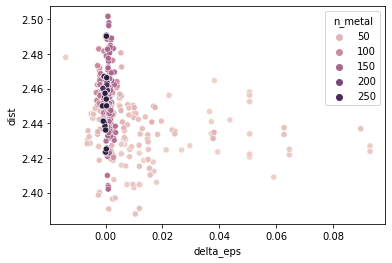

In [14]:
sns.scatterplot(x='delta_eps', y='dist', hue='n_metal', data=df)

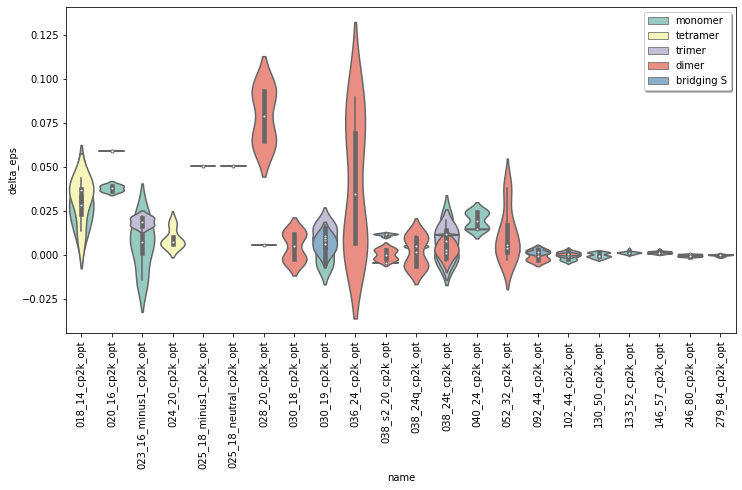

In [15]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='name',y='delta_eps',hue='motif',data=df,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df.name.unique(),rotation=90)
plt.legend(loc='best', shadow=True)
plt.show()

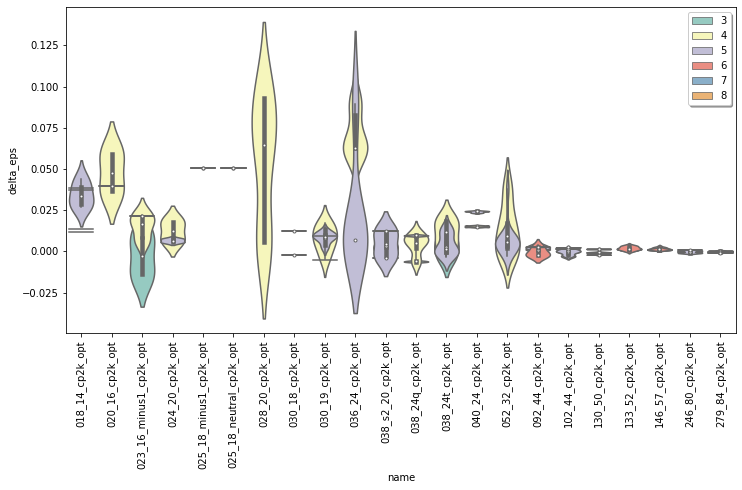

In [16]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='name',y='delta_eps',hue='cn',data=df,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df.name.unique(),rotation=90)
plt.legend(loc='best', shadow=True)
plt.show()

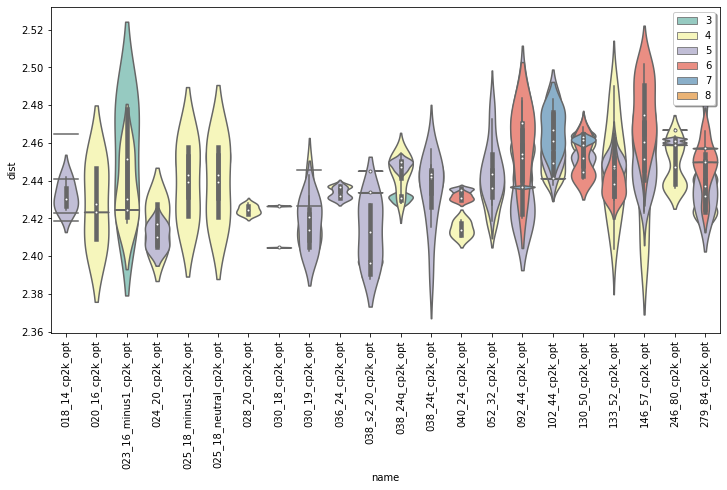

In [25]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='name',y='dist',hue='cn',data=df,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df.name.unique(),rotation=90)
plt.legend(loc='best', shadow=True)
plt.show()

ValueError: Could not interpret input 'Coordination_Number'

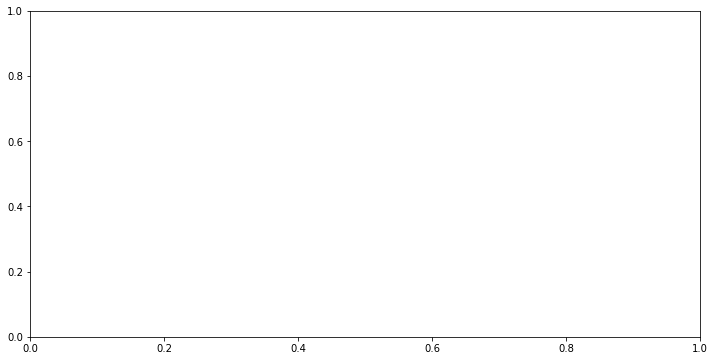

In [24]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='Name',y='Distances',hue='Coordination_Number',data=df,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df.Name.unique(),rotation=90)
plt.legend(loc='best', shadow=True)
plt.show()

In [27]:
col = ['bridging S','monomer','dimer','trimer']
df_new = df[df['motif'].isin(col)]

In [28]:
df2 = df.sort_values('cn')

In [29]:
df2.reset_index(inplace=True)

In [30]:
df2.drop('index',axis=1,inplace=True)

In [31]:
col = ['bridging S','monomer','dimer','trimer']
df3 = df2[df2['motif'].isin(col)]

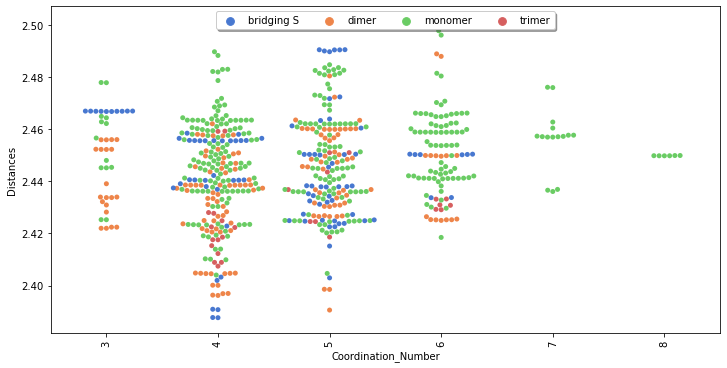

In [16]:
fig,ax = plt.subplots(figsize=(12,6))
sns.swarmplot(x='Coordination_Number',y='Distances',hue='Motif_Type',data=df3, palette="muted",dodge=False,ax=ax)
ax.set_xticklabels(df3.Coordination_Number.unique(),rotation=90)
plt.legend(loc='upper center', shadow=True,ncol=7)
plt.show()

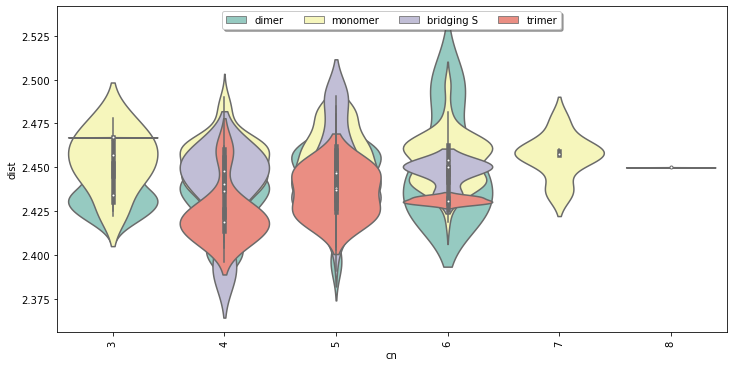

In [32]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='cn',y='dist',hue='motif',data=df3,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df3.cn.unique(),rotation=90)
plt.legend(loc='upper center', shadow=True,ncol=7)
plt.show()

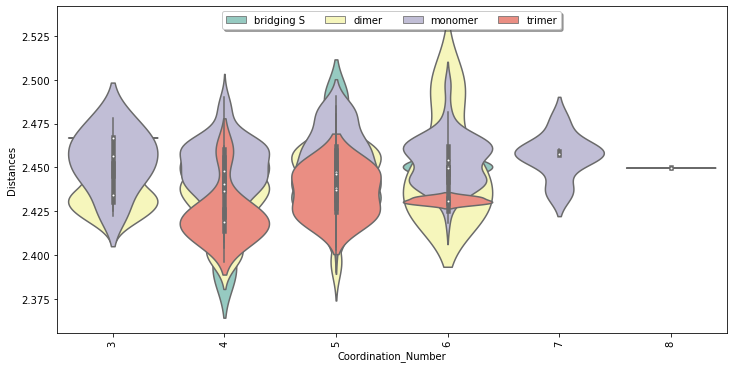

In [17]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='Coordination_Number',y='Distances',hue='Motif_Type',data=df3,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df3.Coordination_Number.unique(),rotation=90)
plt.legend(loc='upper center', shadow=True,ncol=7)
plt.show()

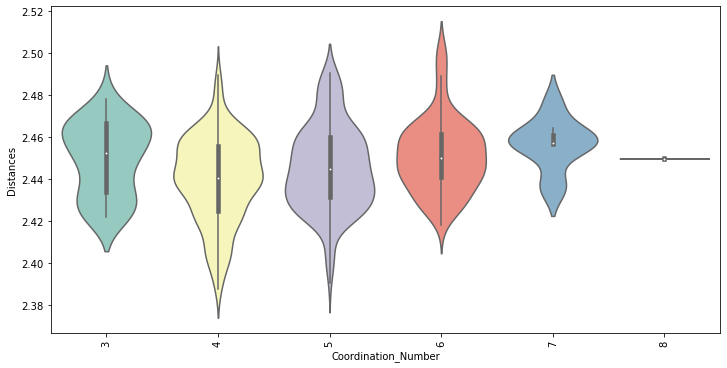

In [18]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(x='Coordination_Number',y='Distances',data=df2,scale="width", palette="Set3",dodge=False,ax=ax)
ax.set_xticklabels(df2.Coordination_Number.unique(),rotation=90)
plt.show()

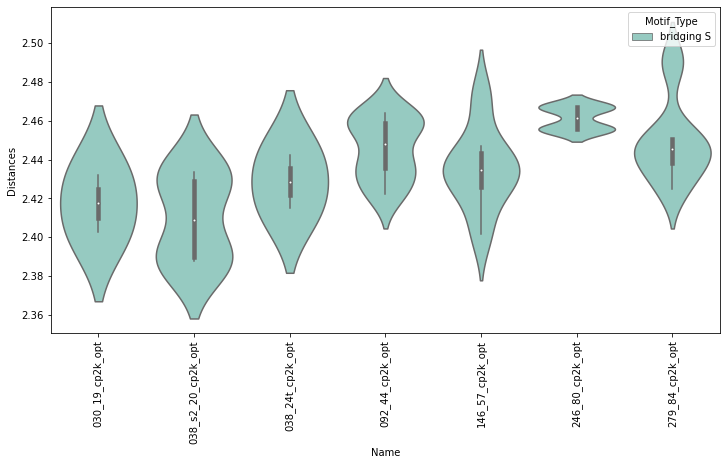

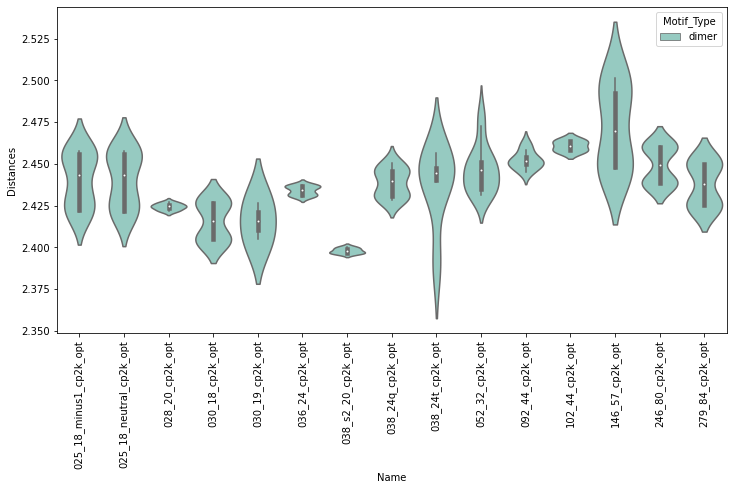

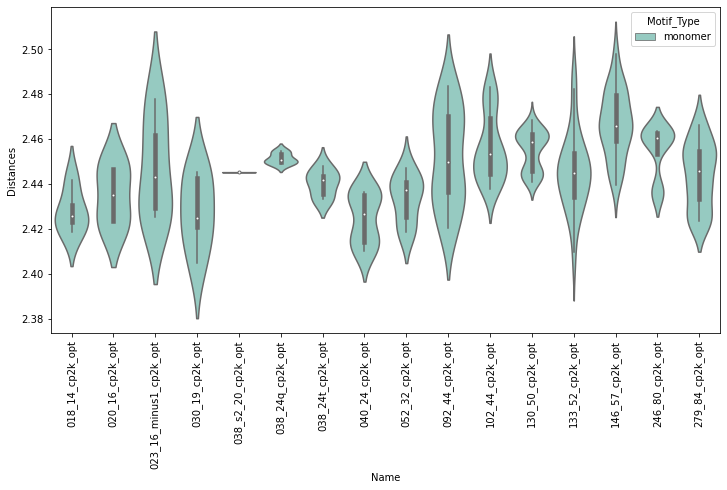

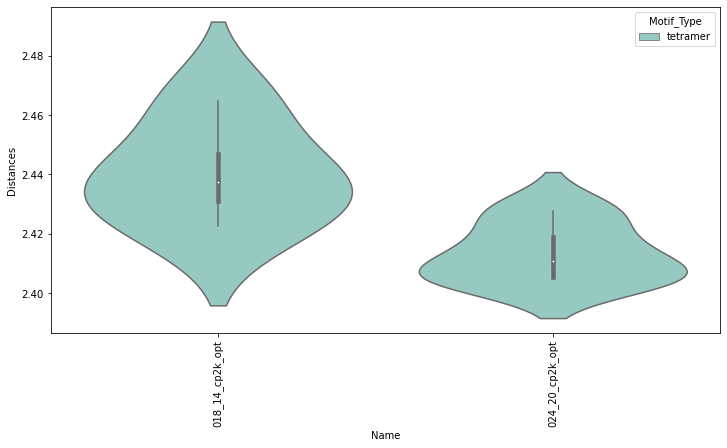

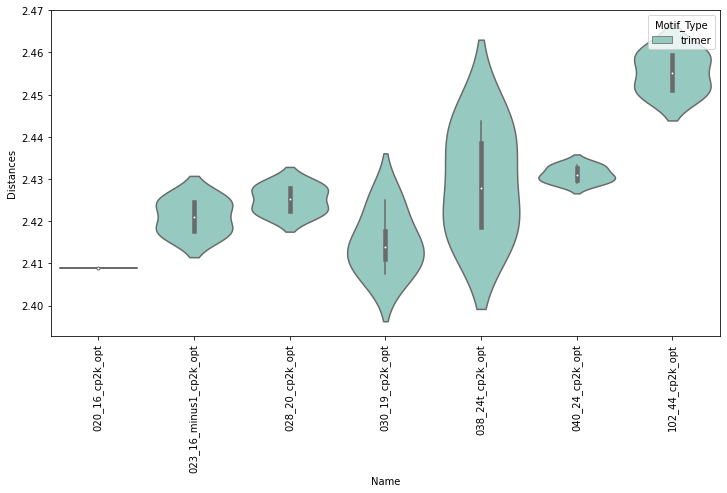

In [19]:
for motif, group in df.groupby('Motif_Type'):
    fig,ax = plt.subplots(figsize=(12,6))
    sns.violinplot(x='Name',y='Distances',hue='Motif_Type',data=group,scale="width", palette="Set3",dodge=False,ax=ax,alpha=0.5)
    ax.set_xticklabels(group.Name.unique(),rotation=90)
plt.show()

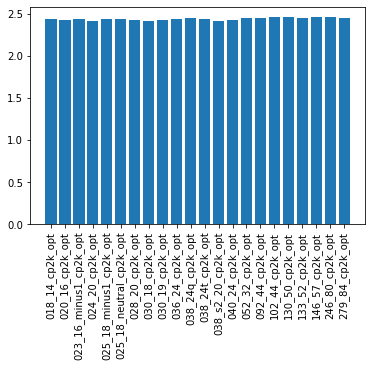

In [20]:
plt.bar(height = df.groupby('Name').mean()['Distances'],x = df.groupby('Name').mean().index)
plt.xticks(rotation=90)
plt.show()